In [1]:
import pandas as pd
import pytz, datetime
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
path='datos2020/2020/'
datos= pd.read_csv(path+"DAT02-31_Marzo.csv", dtype={'Fecha': 'str','Hora(UTC)': 'str'})


In [3]:
mex=pd.DataFrame(datos)
mex['datetime']=pd.to_datetime(mex['Fecha'] +mex['Hora(UTC)'], format='%d%m%y%H%M%S')
mex.set_index(['datetime'],drop=True, inplace=True)

In [4]:
mex.head()

,Fecha,Hora(UTC),Coincidencias
datetime,,,
2020-03-01 00:00:42,010320,000042,85
2020-03-01 00:01:43,010320,000143,66
2020-03-01 00:02:43,010320,000243,89
2020-03-01 00:03:43,010320,000343,74
2020-03-01 00:04:43,010320,000443,89


In [5]:

flagMex=np.logical_and(mex.index>"2020-03-01",mex.index<"2020-03-08")

In [26]:
path='datos2021/'
filenamePy=path+'testflux.json'


In [27]:
py = pd.read_json (filenamePy, lines=True)
py['datetime']=pd.to_datetime(py.hora, unit='s',utc=True)
py.set_index(['datetime'],drop=True, inplace=True)
py= py.iloc[1:]


In [28]:
py.tail()

,_id,eficiencia,coincidencia,conteo,hora
datetime,,,,,
2021-02-22 11:26:46+00:00,{'$oid': '603394f6c7fd5572d37a7f31'},0.961039,3.700000,444,1.613993e+09
2021-02-22 11:28:46+00:00,{'$oid': '6033956ec7fd5572d37a80cc'},0.944316,3.391667,407,1.613993e+09
2021-02-22 11:30:46+00:00,{'$oid': '603395e6c7fd5572d37a8264'},0.962353,3.408333,409,1.613993e+09
2021-02-22 11:32:46+00:00,{'$oid': '6033965ec7fd5572d37a83ff'},0.935484,3.383333,406,1.613994e+09
2021-02-22 11:34:46.000000238+00:00,{'$oid': '603396d6c7fd5572d37a856d'},0.938931,3.075000,369,1.613994e+09


In [16]:
flagPy1=np.logical_and(py.index>"2021-03-03",py.index<"2021-03-04")
flagPy2=np.logical_and(py.index>"2021-03-10",py.index<"2021-03-11")

In [17]:
py.head()

,_id,eficiencia,coincidencia,conteo,hora
datetime,,,,,
2021-02-15 15:21:34+00:00,{'$oid': '602a917e7e8f922df11be833'},0.953271,3.400000,408,1.613402e+09
2021-02-15 15:29:15.000000238+00:00,{'$oid': '602a934b5cf46e430314979a'},0.943262,3.325000,399,1.613403e+09
2021-02-15 15:31:15+00:00,{'$oid': '602a93c35cf46e4303149923'},0.939759,3.250000,390,1.613403e+09
2021-02-15 15:33:15+00:00,{'$oid': '602a943b5cf46e4303149ae6'},0.963597,3.750000,450,1.613403e+09
2021-02-15 15:35:15+00:00,{'$oid': '602a94b35cf46e4303149c89'},0.950450,3.516667,422,1.613403e+09


In [18]:
py.tail()

,_id,eficiencia,coincidencia,conteo,hora
datetime,,,,,
2021-03-11 14:17:01+00:00,{'$oid': '604a265d21f118293b7c8f47'},0.800000,0.033333,4,1.615472e+09
2021-03-11 14:19:01+00:00,{'$oid': '604a26d521f118293b7c8f4c'},0.363636,0.033333,4,1.615472e+09
2021-03-11 14:21:01+00:00,{'$oid': '604a274d21f118293b7c8f50'},0.500000,0.025000,3,1.615472e+09
2021-03-11 14:23:01.000000238+00:00,{'$oid': '604a27c521f118293b7c8f52'},0.333333,0.008333,1,1.615473e+09
2021-03-11 14:25:01+00:00,{'$oid': '604a283d21f118293b7c8f54'},0.500000,0.008333,1,1.615473e+09


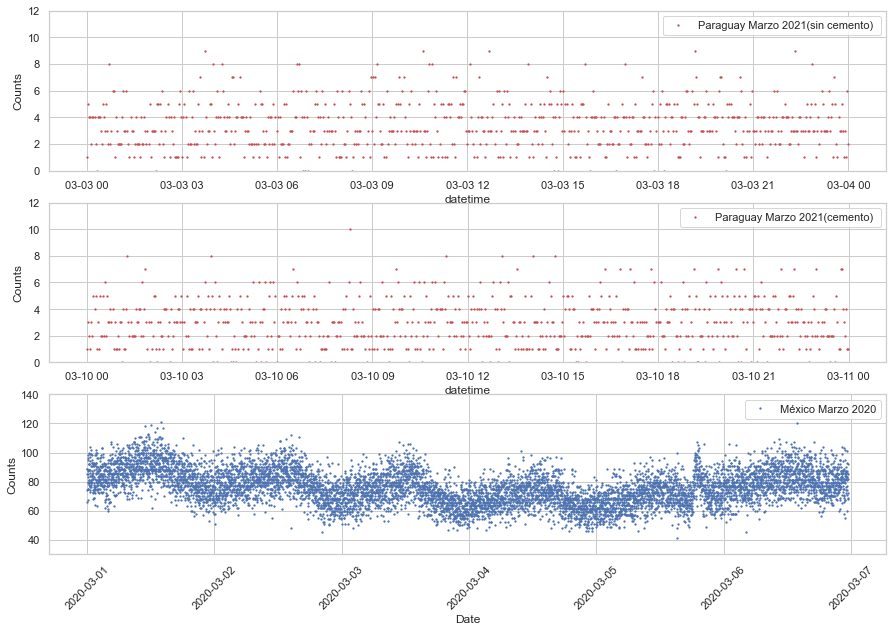

In [23]:
fig, axes = plt.subplots(3,1, figsize=(15,10), sharex=True)
plt.subplot(311)

axes =py['conteo'][flagPy1].plot(marker='.',markersize=2.5, ylim=(0,12),linestyle='None',legend=True,  label='Paraguay Marzo 2021(sin cemento) ',alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylabel('Counts')
plt.subplot(312)

axes =py['conteo'][flagPy2].plot(marker='.',markersize=2.5, ylim=(0,12),linestyle='None',legend=True,  label='Paraguay Marzo 2021(cemento) ',alpha=1,color='r', subplots=True)
ax = plt.gca()
ax.set_ylabel('Counts')

plt.subplot(313)
axes =mex['Coincidencias'][flagMex].plot(marker='.',markersize=2.5, ylim=(30,140),linestyle='None',legend=True,  label='México Marzo 2020',alpha=1,color='b', subplots=True)
ax = plt.gca()
ax.set_ylabel('Counts')
ax.set_xlabel('Date')
plt.xticks(rotation = 45)
plt.savefig('EscaramujovsParaguay.png')

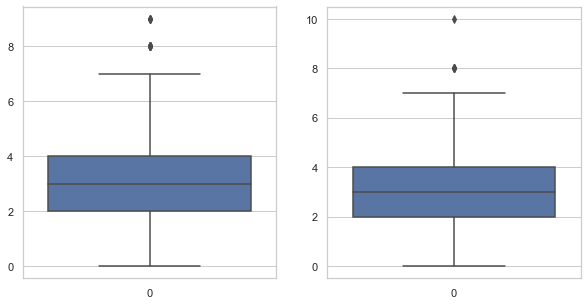

In [20]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(10,5), sharex=True)
plt.subplot(121)
sns.set(style="whitegrid")
ax = sns.boxplot(data=py['conteo'][flagPy1])
plt.subplot(122)
sns.set(style="whitegrid")
ax = sns.boxplot(data=py['conteo'][flagPy2])
plt.savefig("boxplot.png", bbox_inches='tight')